# 🌿 LankaTea Intelligence: Yield Forecasting using machine learning
**Student:** De Zoysa L.K.L.K (214046N)

This notebook demonstrates the end-to-end pipeline for predicting tea yield in Sri Lanka based on environmental and soil chemistry data.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import shap

# Settings
plt.style.use('ggplot')
sns.set_palette('viridis')

## 1. Data Loading

In [9]:
df = pd.read_csv('../dataset/tea_yield_historical_data.csv')
print(f"Dataset contains {df.shape[0]} records and {df.shape[1]} features.")
df.head()

Dataset contains 5000 records and 12 features.


,district,elevation,monthly_rainfall_mm,avg_temp_c,soil_nitrogen,soil_phosphorus,soil_potassium,soil_ph,fertilizer_type,drainage_quality,yield_mt_per_hec,recorded_date
0,Kegalle,Mid,140.7,24.0,28.0,32.3,18.2,4.9,Combo,Fair,0.777,2026-02-23
1,Galle,Low,136.7,30.6,69.7,16.0,46.1,4.9,Combo,Poor,1.063,2026-01-24
2,Galle,Low,126.5,32.8,71.7,12.2,52.8,5.3,Combo,Fair,0.951,2025-12-25
3,Badulla,High,243.8,22.3,35.6,22.9,57.8,4.9,Combo,Poor,1.161,2025-11-25
4,Kandy,Mid,253.1,20.6,55.3,17.0,33.8,5.0,Organic,Fair,0.889,2025-10-26


## 2. Exploratory Data Analysis (EDA)

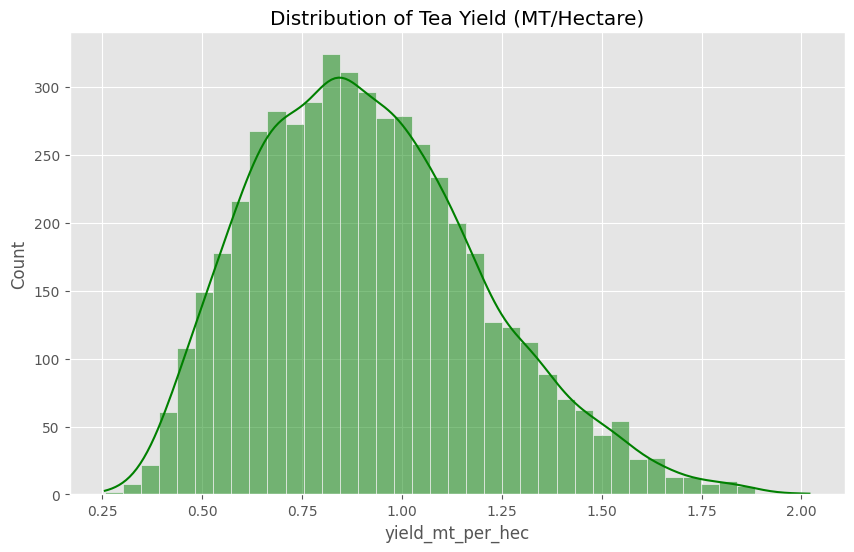

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yield_mt_per_hec'], kde=True, color='green')
plt.title('Distribution of Tea Yield (MT/Hectare)')
plt.show()

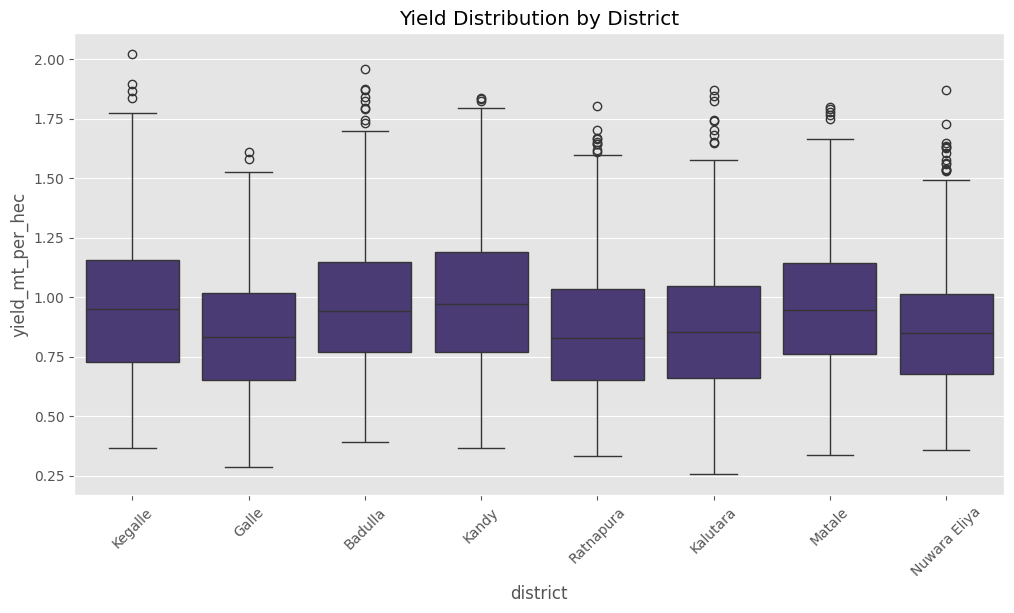

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='district', y='yield_mt_per_hec', data=df)
plt.xticks(rotation=45)
plt.title('Yield Distribution by District')
plt.show()

## 3. Feature Engineering & Preprocessing

In [12]:
FEATURES = ['district', 'elevation', 'monthly_rainfall_mm', 'avg_temp_c', 
            'soil_nitrogen', 'soil_phosphorus', 'soil_potassium', 
            'soil_ph', 'fertilizer_type', 'drainage_quality']
TARGET = 'yield_mt_per_hec'

X = df[FEATURES].copy()
y = df[TARGET]

# Encode categoricals
cat_cols = ['district', 'elevation', 'fertilizer_type', 'drainage_quality']
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

## 4. Model Training (LightGBM)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, verbose=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f} MT")

R2 Score: 0.9918
MAE: 0.0211 MT


## 5. Explainability (SHAP)

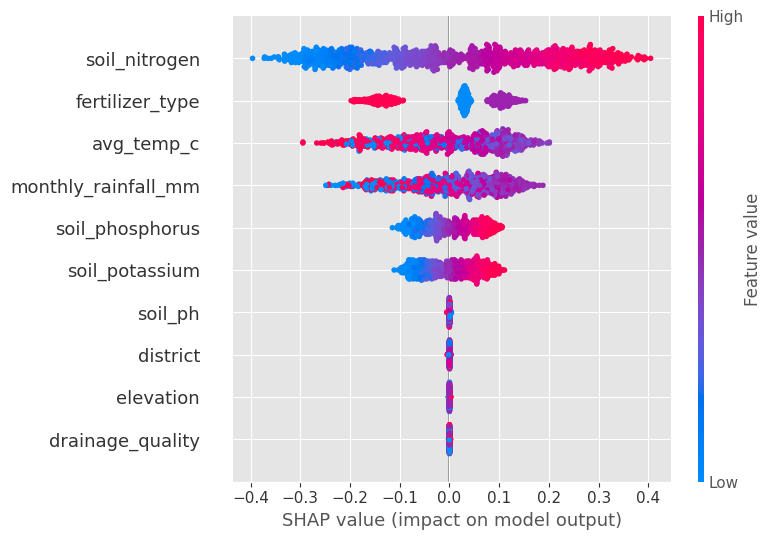

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=FEATURES)